### Requirements

In [86]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import os
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from dateutil import parser
from collections import defaultdict
OPENAI_API_KEY = os.getenv(key='OPENAI_API_KEY')

In [87]:
def _chat(df_path):
    """Langchain Function to dataframe AI chat
    """
    openai_api_key = OPENAI_API_KEY
    df = df_path
    llm = ChatOpenAI(model = "gpt-3.5-turbo", openai_api_key=openai_api_key)
    agent_prefix = "O df importado é\n"

    agent = create_pandas_dataframe_agent(
        llm,
        df,
        prefix=agent_prefix,
        verbose  = True,
        agent_type = AgentType.OPENAI_FUNCTIONS,
    )

    while True:
        prompt = input("Digite o prompt ou 'sair\n'")
        if prompt.lower() == 'sair':
            print("Finalizado...")
            break
        response = agent.invoke(prompt)

### Dataset info

In [123]:
df = pd.read_csv('archive/steam-games.csv')
df.head(1)

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,age_rating,content_descriptor,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,1,0,NaN,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0


In [124]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42497 entries, 0 to 42496
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   app_id                42497 non-null  int64  
 1   title                 42497 non-null  object 
 2   release_date          42440 non-null  object 
 3   genres                42410 non-null  object 
 4   categories            42452 non-null  object 
 5   developer             42307 non-null  object 
 6   publisher             42286 non-null  object 
 7   original_price        4859 non-null   object 
 8   discount_percentage   4859 non-null   object 
 9   discounted_price      42257 non-null  object 
 10  dlc_available         42497 non-null  int64  
 11  age_rating            42497 non-null  int64  
 12  content_descriptor    2375 non-null   object 
 13  about_description     42359 non-null  object 
 14  win_support           42497 non-null  bool   
 15  mac_support        

In [125]:
df.describe()

,app_id,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,4.249700e+04,42497.000000,42497.000000,42497.000000,40020.000000,4.002000e+04,5503.000000,5503.000000
mean,1.245812e+06,0.722004,0.055886,0.309528,77.162569,2.500621e+03,82.303107,282.100491
std,7.553906e+05,4.673810,0.229705,1.264100,17.672036,4.887980e+04,15.110260,4583.606042
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000e+01,6.000000,10.000000
25%,5.892200e+05,0.000000,0.000000,0.000000,68.000000,2.100000e+01,75.000000,16.000000
50%,1.144860e+06,0.000000,0.000000,0.000000,81.000000,5.900000e+01,86.000000,34.000000
75%,1.822640e+06,0.000000,0.000000,0.000000,91.000000,2.820000e+02,93.000000,102.000000
max,3.008050e+06,200.000000,1.000000,41.000000,100.000000,8.062218e+06,100.000000,328633.000000


In [126]:
df.isnull().sum()

app_id                      0
title                       0
release_date               57
genres                     87
categories                 45
developer                 190
publisher                 211
original_price          37638
discount_percentage     37638
discounted_price          240
dlc_available               0
age_rating                  0
content_descriptor      40122
about_description         138
win_support                 0
mac_support                 0
linux_support               0
awards                      0
overall_review           2477
overall_review_%         2477
overall_review_count     2477
recent_review           36994
recent_review_%         36994
recent_review_count     36994
dtype: int64

### Cleaning

In [127]:
# new df without null values = new_df
to_drop = ['original_price', 'discount_percentage', 'content_descriptor', 
                          'recent_review', 'recent_review_%', 'recent_review_count']
new_df = df.drop(columns=to_drop).dropna()

In [128]:
# convert dates to datetime and overall_review_count to int
def convert_date(df):
    try:
        return pd.to_datetime(parser.parse(df))
    except:
        return pd.NaT 
new_df['release_date'] = new_df['release_date'].apply(convert_date).dropna()

new_df['overall_review_count'] = new_df['overall_review_count'].astype(int)

In [134]:
# discounted_price to int
new_df['discounted_price'] = new_df['discounted_price'].replace('Free', '0')
new_df['discounted_price'] = new_df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

### Exploration

In [143]:
_chat(new_df)  #descreva o tipo de distribuição das variáveis numéricas, normal ou assimétricas e as proporções de média e desvio padrão

Digite o prompt ou 'sair
' ' descreva o tipo de distribuição das variáveis numéricas, normal ou assimétricas e as proporções de média e desvio padrão




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


             app_id  discounted_price  dlc_available    age_rating  \
count  3.963500e+04      39635.000000   39635.000000  39635.000000   
mean   1.198936e+06        357.004642       0.758950      0.058004   
std    7.202332e+05        448.914461       4.814349      0.233755   
min    1.000000e+01          0.000000       0.000000      0.000000   
25%    5.769700e+05         72.000000       0.000000      0.000000   
50%    1.098140e+06        250.000000       0.000000      0.000000   
75%    1.733980e+06        479.000000       0.000000      0.000000   
max    3.008050e+06       8325.000000     200.000000      1.000000   

             awards  overall_review_%  overall_review_count  
count  39635.000000      39635.000000          3.963500e+04  
mean       0.326706         77.248366          2.493821e+03  
std        1.294389         17.588508          4.907710e+04  
min        0.000

Digite o prompt ou 'sair
' sair


Finalizado...


### **Análise de Mercado e Tendências**

#### 1. Quais genêros e categorias são mais frequêntes na plataforma.

In [95]:
# 10 generos mais comns 
new_df['genres'].value_counts().head(10)

Action, Indie               2245
Action, Adventure, Indie    2115
Adventure, Indie            1938
Casual, Indie               1681
Adventure, Casual, Indie    1395
Action                      1244
Indie                        963
Action, Casual, Indie        958
Adventure                    843
Casual                       815
Name: genres, dtype: int64

In [96]:
# top 10 categorias mais frequêntes
new_df['categories'].value_counts().head(10)

Single-player, Family Sharing                                                               3530
Single-player, Family Sharing, Profile Features Limited                                     3184
Single-player, Steam Achievements, Family Sharing, Profile Features Limited                 2735
Single-player, Steam Achievements, Family Sharing                                           2150
Single-player, Steam Achievements, Steam Cloud, Family Sharing                              2107
Single-player, Steam Achievements, Steam Trading Cards, Steam Cloud, Family Sharing         1859
Single-player, Profile Features Limited                                                     1513
Single-player, Steam Achievements, Steam Trading Cards, Family Sharing                      1290
Single-player, Steam Achievements, Steam Cloud, Family Sharing, Profile Features Limited    1270
Single-player, Steam Cloud, Family Sharing                                                   782
Name: categories, dtype: int64

In [97]:
# Função para extrair valores distintos da variável = contagem_distinta(df, coluna)
def contagem_distinta(df, coluna):
    """
    Calcula a contagem distinta de valores em uma coluna específica de um DataFrame.

    Parâmetros:
        df (pandas.DataFrame): O DataFrame contendo os dados.
        coluna (str): O nome da coluna que contém os valores a serem contados.

    Retorna:
        dict: Um dicionário contendo os valores únicos como chaves e suas contagens como valores.
    """
    # Array de valores
    valores_array = df[coluna].values
    
    # Dicionário para armazenar a contagem de valores
    contagem_valores = defaultdict(int)
    
    # Iterar sobre cada linha e contar os valores
    for item in valores_array:
        if isinstance(item, str):
            for valor in item.split(", "):
                contagem_valores[valor] += 1
        else:
            contagem_valores[item] += 1
                
    return dict(contagem_valores)


In [98]:
# contagem de generos distintos.
distinct_genres_count = contagem_distinta(new_df, 'genres')
sorted_genres_count = sorted(distinct_genres_count.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genres_count:
    print(f"{genre}: {count}")

Indie: 28398
Action: 17159
Adventure: 16805
Casual: 15108
Simulation: 9193
Strategy: 8464
RPG: 7465
Free to Play: 3882
Early Access: 3546
Sports: 2028
Racing: 1566
Massively Multiplayer: 1145
Education: 7
Utilities: 4
Game Development: 4
Design & Illustration: 4
Audio Production: 3
Animation & Modeling: 2
Video Production: 2
Software Training: 2
Movie: 1
Web Publishing: 1


In [99]:
# Contagem Categorias Distintas
distinct_categories = contagem_distinta(new_df, 'categories')

# Ordenar os valores do dicionário
sorted_categories_count = sorted(distinct_categories.items(), key=lambda x: x[1], reverse=True)

# Imprimir os resultados ordenados
for genre, count in sorted_categories_count:
    print(f"{genre}: {count}")


Single-player: 37913
Family Sharing: 33382
Steam Achievements: 23419
Profile Features Limited: 14298
Steam Cloud: 13531
Steam Trading Cards: 8682
Steam Leaderboards: 4283
Online PvP: 4138
Remote Play Together: 3603
Online Co-op: 3047
Tracked Controller Support: 2255
Stats: 2235
Shared/Split Screen PvP: 2124
VR Only: 1992
Shared/Split Screen Co-op: 1864
Remote Play on TV: 1778
Cross-Platform Multiplayer: 1652
Steam Workshop: 1451
In-App Purchases: 1435
Includes level editor: 1320
Captions available: 927
Remote Play on Tablet: 786
MMO: 660
Remote Play on Phone: 642
Steam is learning about this game: 636
VR Supported: 529
LAN PvP: 411
LAN Co-op: 383
Commentary available: 188
Valve Anti-Cheat enabled: 89
HDR available: 75
Steam Turn Notifications: 74
Includes Source SDK: 40
SteamVR Collectibles: 34
Mods (require HL2): 1
Mods: 1


#### Quais categorias possuem melhores avaliações e mais premiações.

In [100]:
reviews_df = new_df[['title','genres', 'categories','awards', 'overall_review', 'overall_review_%', 'overall_review_count']]
reviews_df.head(2)

,title,genres,categories,awards,overall_review,overall_review_%,overall_review_count
0,Counter-Strike 2,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",1,Very Positive,87.0,8062218
1,Dota 2,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",0,Very Positive,81.0,2243112


In [101]:
# Avaliações por genero
avaliacoes_por_genero = df.groupby('genres')['overall_review_%'].mean()

# Ordenar os resultados pela média das avaliações em ordem decrescente
avaliacoes_por_genero_ordenadas = avaliacoes_por_genero.sort_values(ascending=False)

# Exibir os melhores gêneros
print(avaliacoes_por_genero_ordenadas.head(25))  # Exibir os top 10 gêneros com as melhores avaliações


genres
Adventure, Casual, Simulation, Design & Illustration                                        100.000000
Action, Casual, Massively Multiplayer, Free to Play, Early Access                           100.000000
Casual, Massively Multiplayer, Racing                                                       100.000000
Adventure, Casual, Massively Multiplayer, Sports                                            100.000000
Action, Casual, Free to Play, Indie, Massively Multiplayer, Racing, Simulation, Strategy    100.000000
Indie, Massively Multiplayer, Simulation, Sports                                            100.000000
Action, Adventure, Casual, Racing, Early Access                                             100.000000
Free to Play, Racing, Early Access                                                          100.000000
Casual, Free to Play, Simulation, Sports                                                    100.000000
Action, Casual, Indie, Racing, Strategy                           

In [102]:
#Contagem de Premiações por Gênero
Premiações_por_genero = df.groupby('genres')['awards'].sum()

# Ordenar os resultados pela média das avaliações em ordem decrescente
Premiações_por_genero = Premiações_por_genero.sort_values(ascending=False)

# Exibir os melhores gêneros
print("Contagem de Premiações por Gênero\n",Premiações_por_genero.head(10))  # Exibir os top 10 gêneros com as melhores avaliações


Contagem de Premiações por Gênero
 genres
Adventure, Indie                    1771
Action, Adventure, Indie            1236
Action, Indie                        835
Adventure, Casual, Indie             794
Action, Adventure, Indie, RPG        384
Action, Casual, Indie                356
Adventure                            330
Casual, Indie                        282
Adventure, Indie, RPG                258
Action, Adventure, Casual, Indie     252
Name: awards, dtype: int64


#### Existe uma correlação entre a data de lançamento de um jogo e suas avaliações/reviews?

In [103]:
review_by_date = new_df[['overall_review', 'release_date']]

In [104]:
review_map = {
    'Overwhelmingly Positive': 9,
    'Very Positive': 8,
    'Positive': 7,
    'Mostly Positive': 6,
    'Mixed': 5,
    'Mostly Negative': 4,
    'Negative': 3,
    'Very Negative': 2,
    'Overwhelmingly Negative': 1
}

In [105]:
# Criando uma cópia independente do DataFrame original
review_by_date_copy = review_by_date.copy()

# Substituindo os valores da coluna 'overall_review' na cópia
review_by_date_copy['overall_review'] = review_by_date_copy['overall_review'].replace(review_map)

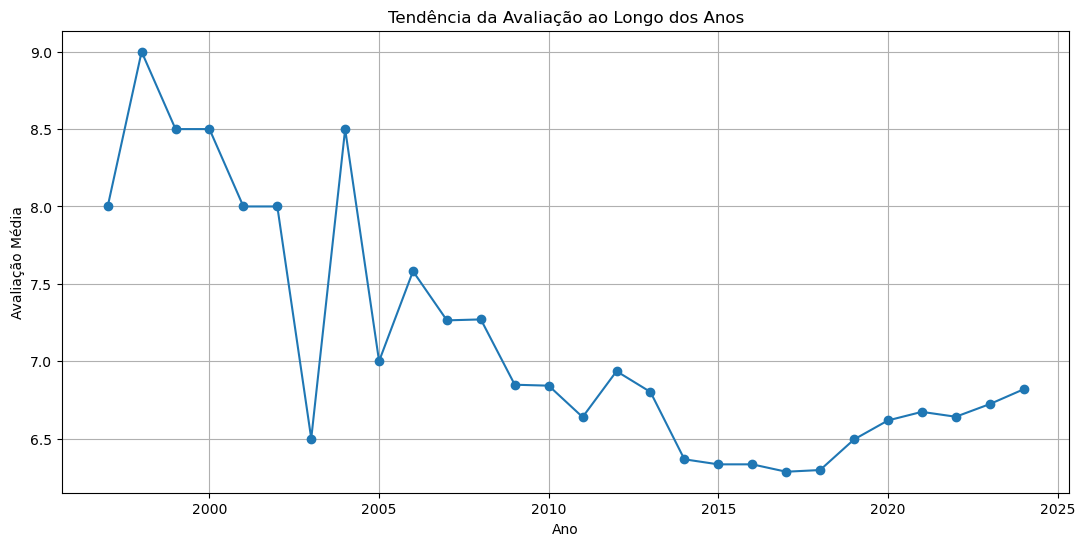

In [106]:
# Extrair o ano da data de lançamento
review_by_date_copy['year'] = review_by_date_copy['release_date'].dt.year

# Calcular a média das avaliações por ano
mean_by_year = review_by_date_copy.groupby('year')['overall_review'].mean()

# Plotar o gráfico de tendência
plt.figure(figsize=(13, 6))
mean_by_year.plot(marker='o', linestyle='-')
plt.title('Tendência da Avaliação ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.show()

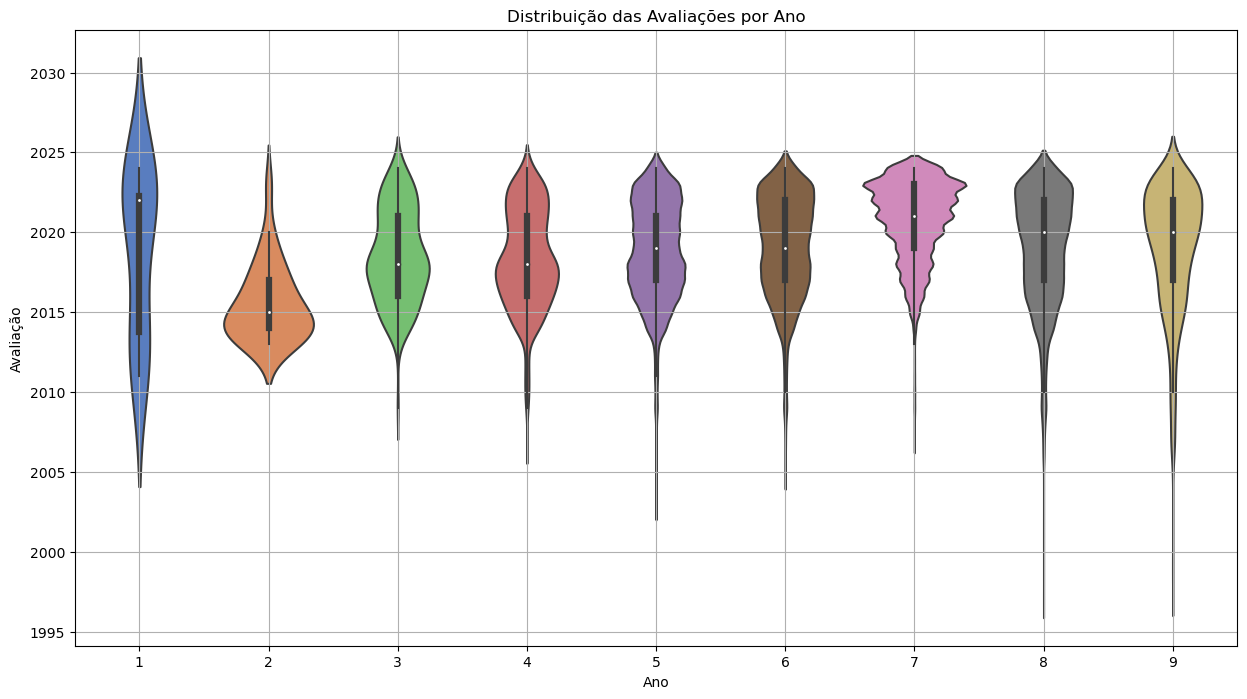

In [107]:

# Extrair o ano da data de lançamento
review_by_date_copy['year'] = review_by_date_copy['release_date'].dt.year

# Plotar violin plot para cada ano
plt.figure(figsize=(15, 8))
sns.violinplot(y='year', x='overall_review', data=review_by_date_copy, palette='muted')
plt.title('Distribuição das Avaliações por Ano')
plt.xlabel('Ano')
plt.ylabel('Avaliação')
plt.grid(True)
plt.show()

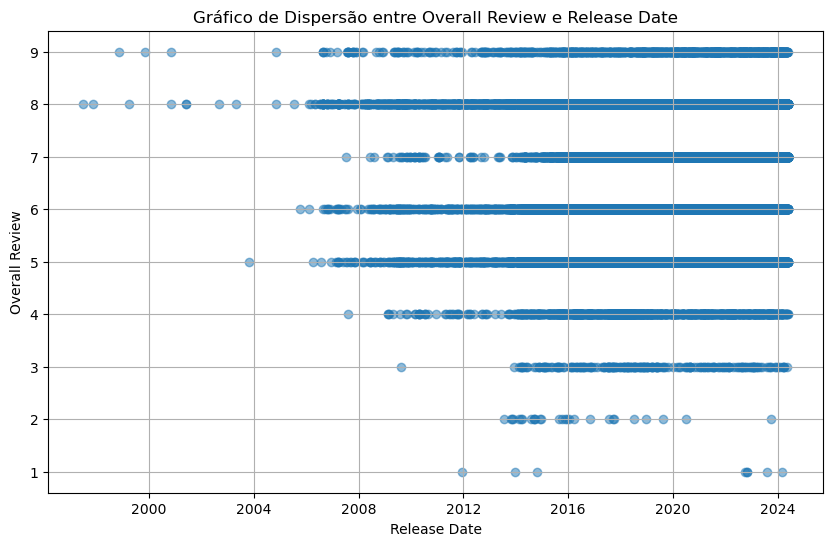

In [108]:
# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(review_by_date_copy['release_date'], review_by_date_copy['overall_review'], alpha=0.5)
plt.title('Gráfico de Dispersão entre Overall Review e Release Date')
plt.xlabel('Release Date')
plt.ylabel('Overall Review')
plt.grid(True)
plt.show()

#### *Quais desenvolvedores e publicadores têm os jogos com melhores avaliações?*

In [109]:
new_df.columns

Index(['app_id', 'title', 'release_date', 'genres', 'categories', 'developer',
       'publisher', 'discounted_price', 'dlc_available', 'age_rating',
       'about_description', 'win_support', 'mac_support', 'linux_support',
       'awards', 'overall_review', 'overall_review_%', 'overall_review_count'],
      dtype='object')

In [110]:
new_df.groupby([ 'developer','publisher'])[['overall_review_%']].mean().sort_values(by='overall_review_%', ascending=False).head(20)

,,overall_review_%
developer,publisher,
Sebastian Lind,Sebastian Lind,100.0
Dreamreason,Dreamreason,100.0
Save Giant Girl,Save Giant Girl,100.0
codegamerstudio,codegamerstudio,100.0
Saucy Melon,Saucy Melon,100.0
Double Tap Games,Double Tap Games,100.0
Satsuki,Shiravune,100.0
DoughnutDev,DoughnutDev,100.0
Douglas Rocha Vasco,Occult Software,100.0


In [111]:
_chat(new_df)

Digite o prompt ou 'sair
' sair


Finalizado...


### **Performance e Avaliações**

#### *Como as avaliações se distribuem entre diferentes gêneros e categorias?*

In [112]:
new_df.groupby(['genres', 'categories'])['overall_review_%'].mean()

genres                               categories                                                                                                                               
Action                               Cross-Platform Multiplayer, Steam Achievements, Steam Cloud, Valve Anti-Cheat enabled, Stats, Includes Source SDK, Family Sharing            96.000000
                                     Cross-Platform Multiplayer, Steam Achievements, Steam Trading Cards, Valve Anti-Cheat enabled, Stats, Includes Source SDK, Family Sharing    90.000000
                                     Family Sharing                                                                                                                               73.333333
                                     Family Sharing, Profile Features Limited                                                                                                     84.000000
                                     In-App Purchases                    

In [115]:
_chat(new_df)

Digite o prompt ou 'sair
' sair


Finalizado...


#### *Como o percentual de desconto varia entre os principais desenvolvedores e publicadores?*

In [140]:
_chat(new_df) # compare como o percentual de desconto varia entre os 10 desenvolvedores com maior número de avaliações

Digite o prompt ou 'sair
' compare como o percentual de desconto varia entre os 10 desenvolvedores com maior número de avaliações




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.groupby('developer').agg({'discounted_price': 'mean', 'overall_review_count': 'sum'}).nlargest(10, 'overall_review_count')"}`


                       discounted_price  overall_review_count
developer                                                    
Valve                        347.478261              13303388
KRAFTON, Inc.                264.500000               2365613
Facepunch Studios            664.250000               1792311
Ubisoft Montreal             738.208333               1663265
Rockstar North               802.000000               1644640
CD PROJEKT RED               331.500000               1515647
Re-Logic                     480.000000               1024921
CAPCOM Co., Ltd.            2100.312500               1023050
Respawn                     1749.500000                876556
Bethesda Game Studios       1291.454545                743074Os 10 desenvolvedores com maior número d

Digite o prompt ou 'sair
' sair


Finalizado...


#### *Como a disponibilidade de suporte para diferentes plataformas (Windows, Mac, Linux) afeta as avaliações e reviews?*

In [141]:
_chat(new_df) # Como a disponibilidade de suporte para diferentes plataformas (Windows, Mac, Linux) afeta as avaliações e reviews?

Digite o prompt ou 'sair
' Como a disponibilidade de suporte para diferentes plataformas (Windows, Mac, Linux) afeta as avaliações e reviews?




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['platform_support'] = df['win_support'].map({True: 'Windows', False: ''}) + df['mac_support'].map({True: ', Mac', False: ''}) + df['linux_support'].map({True: ', Linux', False: ''})\ndf['platform_support']"}`
responded: Para analisar como a disponibilidade de suporte para diferentes plataformas (Windows, Mac, Linux) afeta as avaliações e reviews, podemos realizar uma análise comparativa entre os jogos que possuem suporte para cada uma dessas plataformas. 

Podemos agrupar os jogos em três categorias: 
1. Jogos com suporte para Windows apenas
2. Jogos com suporte para Mac apenas
3. Jogos com suporte para Linux apenas

Em seguida, podemos calcular as médias das avaliações e reviews para cada categoria e comparar os resultados. Isso nos dará uma ideia de como a disponibilidade de suporte para diferentes plataformas pode influenciar as avaliações e reviews dos jogos.

Vamos realizar essas etapas utiliz

Digite o prompt ou 'sair
' sair


Finalizado...


### **Jogos mais populares**

In [152]:
_chat(new_df)

Digite o prompt ou 'sair
' liste o jogo mais popular e melhor avaliado dos 10 generos mais frequentes do conjunto.




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['genres'].value_counts().head(10)"}`


Action, Indie               2245
Action, Adventure, Indie    2115
Adventure, Indie            1938
Casual, Indie               1681
Adventure, Casual, Indie    1395
Action                      1244
Indie                        963
Action, Casual, Indie        958
Adventure                    843
Casual                       815
Name: genres, dtype: int64
Invoking: `python_repl_ast` with `{'query': "top_games = df.groupby('genres').apply(lambda x: x.nlargest(1, 'overall_review_%')).reset_index(drop=True)\ntop_games[['genres', 'title', 'overall_review', 'overall_review_%']]"}`
responded: Os 10 gêneros mais frequentes no conjunto de dados são:

1. Action, Indie
2. Action, Adventure, Indie
3. Adventure, Indie
4. Casual, Indie
5. Adventure, Casual, Indie
6. Action
7. Indie
8. Action, Casual, Indie
9. Adventure
10. Casual

Agora vou identificar o jogo mais popular e

Digite o prompt ou 'sair
' sair


Finalizado...


In [145]:
new_df.to_csv('new-steam-games.csv.csv', index=False)

In [150]:
_chat(new_df)

Digite o prompt ou 'sair
' liste os 5 jogos mais populares e melhores avaliados de cara genrer




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.groupby('genres')[['title', 'overall_review_%']].apply(lambda x: x.nlargest(5, 'overall_review_%'))"}`


                                                             title  \
genres                                                               
Action               6911                          Monster Bullets   
                     7003                            Nasty Zombies   
                     8625                        SHINOBI NON GRATA   
                     10611                       Take No Prisoners   
                     12778                        そこへ向かう(GO THERE)   
...                                                            ...   
Strategy, RPG, Indie 24837                  Geneforge 5: Overthrow   
                     7679                              Geneforge 1   
                     24673                             Geneforge 2   
                     13897          

Digite o prompt ou 'sair
' sair


Finalizado...


In [158]:
_chat(new_df) # liste os 10 jogos com maior quantidade de avaliações e seus respectivos generos e categoria,

Digite o prompt ou 'sair
'  liste os 20 jogos com maior quantidade de avaliações e seus respectivos generos e categoria




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.nlargest(20, 'overall_review_count')[['title', 'genres', 'categories', 'overall_review_count']]"}`


                               title  \
0                   Counter-Strike 2   
7                PUBG: BATTLEGROUNDS   
1                             Dota 2   
14                Grand Theft Auto V   
26   Tom Clancy's Rainbow Six® Siege   
55                   Team Fortress 2   
122                         Terraria   
197                      Garry's Mod   
13                              Rust   
8                      Apex Legends™   
41         The Witcher® 3: Wild Hunt   
5                     Cyberpunk 2077   
227                    Left 4 Dead 2   
10                     HELLDIVERS™ 2   
3                         ELDEN RING   
37                    Stardew Valley   
305                         Among Us   
4                          Destiny 2   
18                          Warframe   
16        

Digite o prompt ou 'sair
' sair


Finalizado...
